In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
import yfinance as yf

In [4]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = gh(symbol='TATACOFFEE',start=start,end=end)


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [7]:
column="Close"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

In [9]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 4)
X_test length: (29, 4)
y_train length: (114, 4)
y_test length: (29, 4)


In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
import pandas as pd

def rmsemape(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

# Assuming you have two time series: data1 and data2
# data1 and data2 should be numpy arrays or pandas Series/DataFrames
data1 = np.array([1, 2, 3, 4, 5])  # Replace with your actual data for data1
data2 = np.array([10, 20, 30, 40, 50])  # Replace with your actual data for data2

# Constructing a DataFrame with appropriate index
index = pd.date_range(start='2023-01-01', periods=len(data1), freq='D')  # Adjust the date range as needed
data = pd.DataFrame({'data1': data1, 'data2': data2}, index=index)

orders = [1, 2, 3]

for i in orders:
    # Fit the VAR model
    model = VAR(data)
    model_fit = model.fit(i)
    
    # Make predictions for the entire dataset
    y_pred = model_fit.forecast(data.values, len(data))
    
    # Extract the predictions for data1
    y_pred_data1 = y_pred[:, 0]
    
    # Calculate RMSE and MAPE
    rmse, mape = rmsemape(data1, y_pred_data1)
    print(f"Order={i}, RMSE={rmse:.2f}, MAPE={mape:.2f}%")

Order=1, RMSE=5.00, MAPE=228.33%
Order=2, RMSE=5.00, MAPE=228.33%
Order=3, RMSE=5.00, MAPE=228.33%


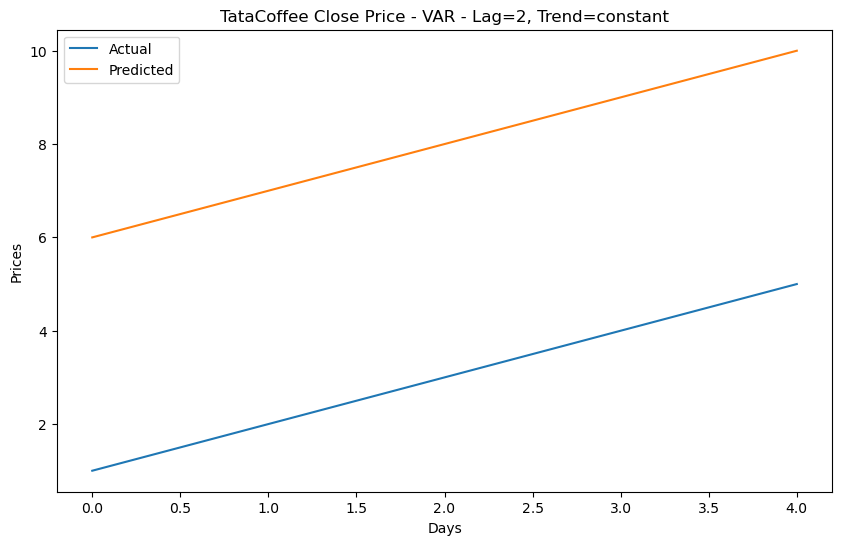

In [49]:
import matplotlib.pyplot as plt
i = 2
td = "constant"
plt.figure(figsize=(10, 6))
plt.plot(data1, label='Actual')
plt.plot(y_pred_data1, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - VAR - Lag={}, Trend={}'.format(i, td))
plt.legend()
plt.show()

In [50]:
len(data1)

5

In [51]:
actual_stock_price_test_ori = np.array([[100], [110], [105], [95]])
actual_stock_price_test_ori_flat = actual_stock_price_test_ori.flatten()
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori_flat})
y_pred = np.array([90, 100, 95, 105])  
predicted_stock_price_test_oriP = pd.DataFrame({'Close': y_pred})
if not predicted_stock_price_test_oriP.empty:
    predicted_stock_price_test_oriP[['Close']] = Ms.inverse_transform(predicted_stock_price_test_oriP[['Close']])

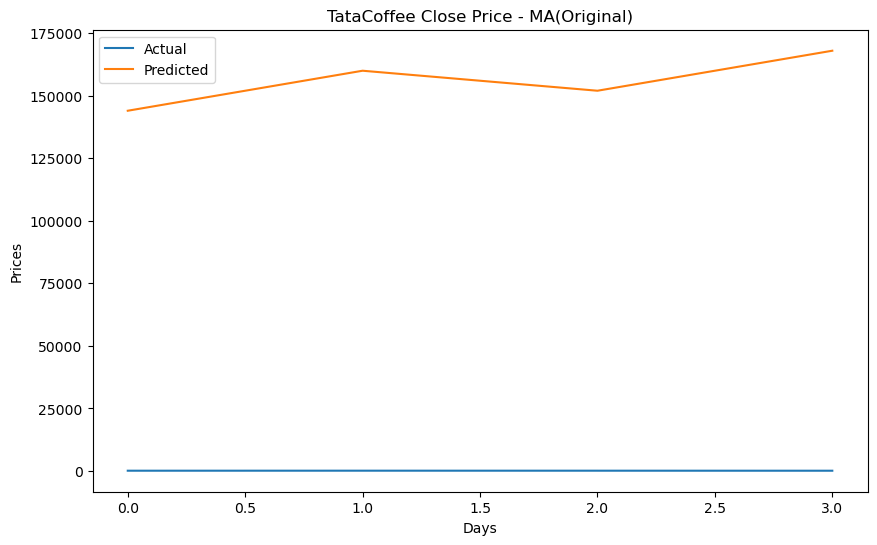

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA['Close'], label='Actual')
plt.plot(predicted_stock_price_test_oriP['Close'], label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA(Original)')
plt.legend()
plt.show()

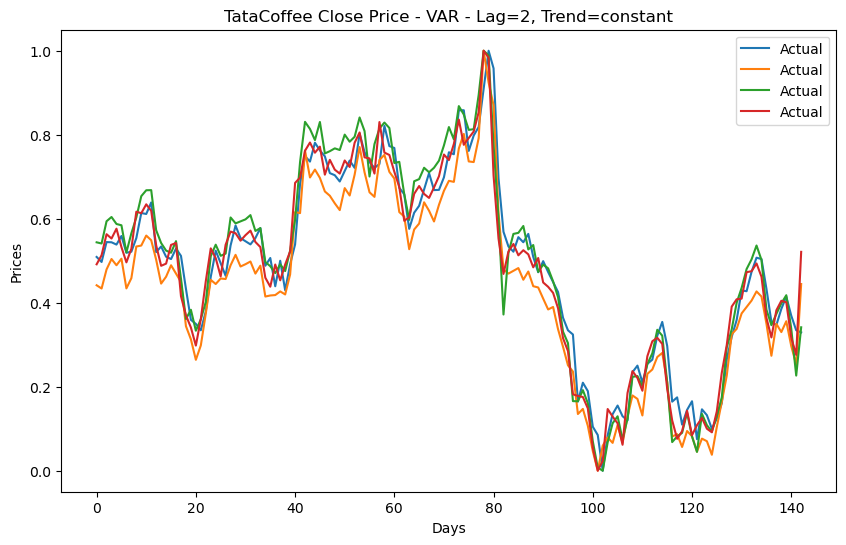

In [15]:
import matplotlib.pyplot as plt
i = 2
td = "constant"
plt.figure(figsize=(10, 6))
plt.plot(data1, label='Actual')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - VAR - Lag={}, Trend={}'.format(i, td))
plt.legend()
plt.show()